# **GRADED CHALLENGE 2**

# INTRODUCTION

Name    : Fitri Octaviani

Batch   : HCK 006

# SQL QUERY




```
SELECT report_date, load_time, load_type, load_weight, dropoff_site FROM `bigquery-public-data.austin_waste.waste_and_diversion`
WHERE report_date BETWEEN '2021-01-01' AND '2021-07-21'
ORDER BY report_date ASC
```



# **Problem 1 (Stats)**

 ## Import Library


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Loading

1. Melakukan perhitungan dan analisa statistik, pembersihan data (missing value).

In [2]:
# parse_date : mengubah representasi string dari nilai tanggal dan waktu menjadi DateTime yang setara
df = pd.read_csv('/content/sample_data/h8dsft_P0GC2_Fitri Octaviani.csv', parse_dates=['report_date'])
df

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
1,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
2,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
3,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF
...,...,...,...,...,...
26152,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
26153,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND
26154,2021-07-09,2021-07-09 11:55:00 UTC,BRUSH,4340.0,HORNSBY BEND
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL


In [3]:
# menampilkan sejumlah baris dari bawah dataset
df.tail()

,report_date,load_time,load_type,load_weight,dropoff_site
26152,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
26153,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND
26154,2021-07-09,2021-07-09 11:55:00 UTC,BRUSH,4340.0,HORNSBY BEND
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL
26156,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,3040.0,TDS LANDFILL


In [4]:
# menampilkan sejumlah baris pertama dari atas dataset
df.head()

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
1,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
2,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
3,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF


In [5]:
# menampilkan hasil info dari dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   report_date   26157 non-null  datetime64[ns]
 1   load_time     26157 non-null  object        
 2   load_type     26157 non-null  object        
 3   load_weight   25109 non-null  float64       
 4   dropoff_site  26157 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1021.9+ KB


## Missing Value

In [6]:
# missing value dari dataset
df.isnull().sum()

report_date        0
load_time          0
load_type          0
load_weight     1048
dropoff_site       0
dtype: int64

Dalam dataset tersebut terdapat missing value pada load_weight

In [7]:
# Isi nilai NA/NaN pada load_weight menggunakan metode yang ditentukan
df['load_weight'] = df['load_weight'].fillna(df['load_weight'].median())
df

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,11300.0,ONION CREEK
1,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,11300.0,ONION CREEK
2,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,11300.0,ONION CREEK
3,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,11300.0,ONION CREEK
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF
...,...,...,...,...,...
26152,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
26153,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND
26154,2021-07-09,2021-07-09 11:55:00 UTC,BRUSH,4340.0,HORNSBY BEND
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL


In [8]:
# melihat missing value 
df.isnull().sum()

report_date     0
load_time       0
load_type       0
load_weight     0
dropoff_site    0
dtype: int64

Dalam hal ini sudah tidak missing value.

## Eksplorasi Data

2. Eksplorasi data sederhana untuk mengetahui dan mengenali dataset.

In [9]:
# melihat rentang waktu minimal
df.report_date.min()

Timestamp('2021-01-01 00:00:00')

In [10]:
# melihat rentang waktu maksimal
df.report_date.max()

Timestamp('2021-07-09 00:00:00')

In [11]:
# menghitung rentang waktu
rentang_waktu = df['report_date'].max() - df['report_date'].min()
rentang_waktu

Timedelta('189 days 00:00:00')

In [12]:
# Melihat load sampah yang ada di kota Austin
df['load_type'].value_counts()

GARBAGE COLLECTIONS          8242
RECYCLING - SINGLE STREAM    6760
ORGANICS                     5763
BULK                         1594
BRUSH                        1517
SWEEPING                     1390
MIXED LITTER                  329
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

In [13]:
# Melihat lokasi dropsite atau pembuangan sampah ada dimana saja
df['dropoff_site'].value_counts()

TDS LANDFILL             10694
ORGANICS BY GOSH          5755
BALCONES RECYCLING        3837
TDS - MRF                 2948
HORNSBY BEND              1655
ONION CREEK                813
MRF                        168
ON ROUTE HIGH DUMP          81
PARK CENTER                 75
GREAT NORTHERN              70
AUSTIN IRON AND METAL       50
PARK BEND                    4
AUSTIN WOOD RECYCLING        2
WILCAB                       1
BALCONES WOODS               1
STEINER LANDFILL             1
WESTFIELD                    1
ST. EDWARDS                  1
Name: dropoff_site, dtype: int64

## Central Tendency

3. Menghitung mean, median, dan modus untuk masing-masing site.


In [14]:
# Menghitung mean, median, modus load_weight untuk dropoff_site
formula = df.groupby('dropoff_site')['load_weight'].agg(['mean', 'median', lambda x: x.mode()[0]])

# Rename kolom lambda menjadi modus
formula = formula.rename(columns={'<lambda_0>' : 'modus'})

# Menampilkan hasil
print (formula)

                               mean   median    modus
dropoff_site                                         
AUSTIN IRON AND METAL    451.200000    400.0    260.0
AUSTIN WOOD RECYCLING   4050.000000   4050.0   2340.0
BALCONES RECYCLING      9464.652072   9840.0  11880.0
BALCONES WOODS          8460.000000   8460.0   8460.0
GREAT NORTHERN         11973.142857  11300.0  11300.0
HORNSBY BEND            6637.111782   6400.0   5500.0
MRF                     1799.982143   1360.0    960.0
ON ROUTE HIGH DUMP     11405.925926  11300.0  11300.0
ONION CREEK            11300.000000  11300.0  11300.0
ORGANICS BY GOSH       11817.220851  11900.0  11300.0
PARK BEND              13385.000000  12330.0   8480.0
PARK CENTER            11300.000000  11300.0  11300.0
ST. EDWARDS            11300.000000  11300.0  11300.0
STEINER LANDFILL         780.000000    780.0    780.0
TDS - MRF               9872.550882  10330.0  10360.0
TDS LANDFILL           15168.321726  14920.0     20.0
WESTFIELD              16020

Informasi yang di dapatkan setelah di hitung central tendecy adalah pemerintah perlu mempertimbangkan dalam mengambil keputusan terkait pengelolaan sampah di kota mereka agar tidak terjadinya overload.

## Site yang Menarik

4. Memilih site yang paling menarik.

Site yang saya aambil adalah MRF dikarenakan dalam hal dropoff site tersebut MRF memiliki median dengan ukuran ke-3.

In [15]:
# Memilih data 'dropoff_site' dengan kategori MRF menggunanakan slicing

df_MRF = df.loc[df['dropoff_site'] == 'MRF']
df_MRF

,report_date,load_time,load_type,load_weight,dropoff_site
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF
5,2021-01-02,2021-01-02 11:47:00 UTC,TIRES,940.0,MRF
564,2021-01-06,2021-01-06 12:49:00 UTC,TIRES,40.0,MRF
565,2021-01-06,2021-01-06 03:30:00 UTC,TIRES,100.0,MRF
749,2021-01-07,2021-01-07 12:17:00 UTC,TIRES,1440.0,MRF
...,...,...,...,...,...
25862,2021-07-07,2021-07-07 11:40:00 UTC,TIRES,340.0,MRF
26008,2021-07-08,2021-07-08 12:00:00 UTC,TIRES,2260.0,MRF
26009,2021-07-08,2021-07-08 11:00:00 UTC,TIRES,1260.0,MRF
26010,2021-07-08,2021-07-08 03:00:00 UTC,TIRES,800.0,MRF


## Outliers

5. Cek ada atau tidak adanya outliers.

In [16]:
# column.tolist : mengubah kolom dataframe tertentu menjadi daftar
df_col = df_MRF.columns.tolist()
df_col

['report_date', 'load_time', 'load_type', 'load_weight', 'dropoff_site']

In [17]:
# handling outlier sesuai dropoff site
def plot_dist(df_MRF, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (10, 5))
    
    # histogram
    sns.histplot(df_MRF[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df_MRF[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df_MRF[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df_MRF[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df_MRF[col].name + ' Kurtosis: ' + str(df_MRF[col].kurt()))
    print(df_MRF[col].name + ' Skewness: ' + str(df_MRF[col].skew()))
    if -0.5 <= df_MRF[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df_MRF[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df_MRF[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

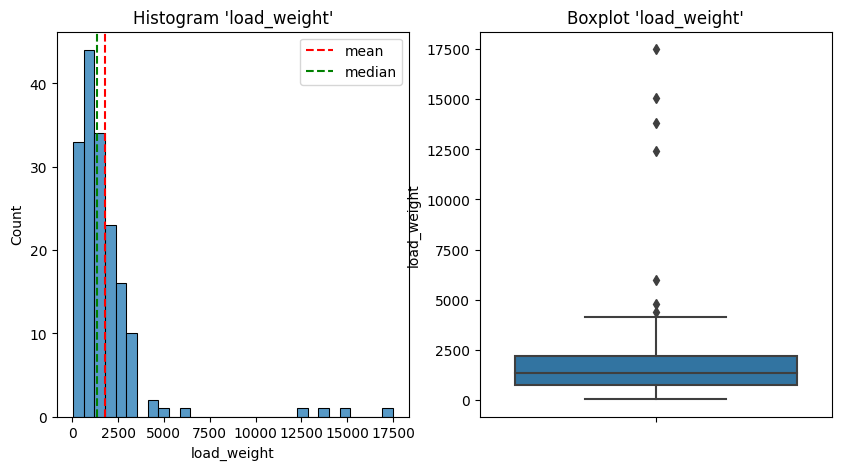

load_weight Kurtosis: 26.60041525232097
load_weight Skewness: 4.77255984020812
Columns 'load_weight' right skewed


In [18]:
# Visualisasi data
plot_dist(df_MRF, df_col[3])

Berdasarkan hasil pengecekan skewness, data tidak berdistribusi normal dikarenakan nilai skewness mecapai 3.8749. Dalam skewness, jika nilai kurang dari -1 atau lebih besar dari 1, datanya sangat miring. Dan dalam perhitunganpun columns load_weight right skewed.

Dalam oxplot menunjukkan adanya outliers atau data yang terletak jauh dari data lain.

Handling outliers 

In [19]:
# Menghitung Q1 (25), Q2 (50), dan Q3 (75)
quartile = np.percentile(df_MRF['load_weight'], [25, 50, 75])
quartile

array([ 740., 1360., 2180.])

In [20]:
# Menghitung Q1
Q1 = df_MRF ['load_weight'].quantile(0.25)
print ('Q1 adalah : ', Q1)

Q1 adalah :  740.0


In [21]:
# Menghitung Q2
Q2 = df_MRF ['load_weight'].quantile(0.50)
print ('Q2 adalah : ', Q2)

Q2 adalah :  1360.0


In [22]:
# Menghitung Q3
Q3 = df_MRF ['load_weight'].quantile(0.75)
print('Q3 adalah : ', Q3)

Q3 adalah :  2180.0


In [23]:
# Menghitung interquartile range (IQR)
IQR = Q3 - Q1
print('IQR adalah', IQR)

IQR adalah 1440.0


In [24]:
# Menghitung upper
Upper = Q3 + (3 * IQR)
print ('Upper adalah', Upper)

Upper adalah 6500.0


In [25]:
# Menghitung lower
Lower = Q1 - (3*IQR)
print ('Lower adalah', Lower)

Lower adalah -3580.0


In [26]:
# Mencari berapa banyak outliers
df_MRF[(df_MRF['load_weight'] < Lower) | (df_MRF['load_weight'] > Upper)].count()

report_date     4
load_time       4
load_type       4
load_weight     4
dropoff_site    4
dtype: int64

Jumlah outliers tersebut ada 4.

In [27]:
# Return series yang berisi unique value dari df_MRF
df_MRF.value_counts()

report_date  load_time                load_type  load_weight  dropoff_site
2021-01-02   2021-01-02 09:24:00 UTC  TIRES      1640.0       MRF             1
2021-05-26   2021-05-26 11:55:00 UTC  TIRES      2700.0       MRF             1
2021-05-20   2021-05-20 03:45:00 UTC  TIRES      2620.0       MRF             1
2021-05-24   2021-05-24 03:15:00 UTC  TIRES      1580.0       MRF             1
             2021-05-24 11:00:00 UTC  TIRES      1479.0       MRF             1
                                                                             ..
2021-03-20   2021-03-20 08:35:00 UTC  TIRES      520.0        MRF             1
             2021-03-20 12:12:00 UTC  TIRES      3020.0       MRF             1
2021-03-24   2021-03-24 09:10:00 UTC  TIRES      1700.0       MRF             1
2021-04-05   2021-04-05 12:00:00 UTC  TIRES      360.0        MRF             1
2021-07-08   2021-07-09 12:00:00 UTC  TIRES      560.0        MRF             1
Length: 168, dtype: int64

In [28]:
# Persentase dari jumlah outliers
df_MRF_outliers = df_MRF [(df_MRF['load_weight'] < Lower) | (df_MRF['load_weight'] > Upper)]
df_MRF_outliers['load_weight'].count() / df_MRF['load_weight'].count() * 100

2.380952380952381

In [29]:
# Trimming Outliers atau menghapus data outliers

no_outliers = df_MRF[(df_MRF['load_weight'] >= Lower)&(df_MRF['load_weight'] <= Upper)]
no_outliers

,report_date,load_time,load_type,load_weight,dropoff_site
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF
5,2021-01-02,2021-01-02 11:47:00 UTC,TIRES,940.0,MRF
564,2021-01-06,2021-01-06 12:49:00 UTC,TIRES,40.0,MRF
565,2021-01-06,2021-01-06 03:30:00 UTC,TIRES,100.0,MRF
749,2021-01-07,2021-01-07 12:17:00 UTC,TIRES,1440.0,MRF
...,...,...,...,...,...
25862,2021-07-07,2021-07-07 11:40:00 UTC,TIRES,340.0,MRF
26008,2021-07-08,2021-07-08 12:00:00 UTC,TIRES,2260.0,MRF
26009,2021-07-08,2021-07-08 11:00:00 UTC,TIRES,1260.0,MRF
26010,2021-07-08,2021-07-08 03:00:00 UTC,TIRES,800.0,MRF


In [30]:
# Membandingkan central tendency data yang belum dan sudah dikeluarkan outliernya.

# Central tendency pada dataframe yang belum dibersihkan dari outlier
mean_with_outliers = df_MRF['load_weight'].mean()
median_with_outliers = df_MRF['load_weight'].median()
mode_with_outliers = df_MRF['load_weight'].mode()

# Central tendency pada dataframe yang sudah dibersihkan dari outlier
mean_without_outliers = no_outliers['load_weight'].mean()
median_without_outliers = no_outliers['load_weight'].median()
mode_without_outliers = no_outliers['load_weight'].mode() 

# Perbandingan Central Tendency
print('Mean with outliers : ', mean_with_outliers)
print('Mean without outliers : ', mean_without_outliers)
print('Median with outliers : ', median_with_outliers)
print('Median without outliers : ', median_without_outliers)
print('Mode with outliers : ', mode_with_outliers)
print('Mode without outliers : ', mode_without_outliers)

Mean with outliers :  1799.982142857143
Mean without outliers :  1485.3475609756097
Median with outliers :  1360.0
Median without outliers :  1340.0
Mode with outliers :  0    960.0
Name: load_weight, dtype: float64
Mode without outliers :  0    960.0
Name: load_weight, dtype: float64


## Range, Variance, Standar Deviasi

6. Menghitung range, variance, dan standar deviasi untuk data load_weight.

In [31]:
# Menghitung range
range = np.ptp(no_outliers['load_weight'])
print ('Range : ', range)


# Menghitung variance
variance = np.var(no_outliers['load_weight'])
print ('Varieance : ', variance)


# Menghitung stander deviasi
std = np.std(no_outliers['load_weight'])
print ('Standard deviation : ', std)

Range :  5960.0
Varieance :  986471.677981856
Standard deviation :  993.212805989661


Dari hasil diatas diperoleh informasi bahwa load weight di lokasi MRF jauh dari nilai rata-rata. 

## Confidence Interval

7. Kapasitas penampungan berdasarkan perhitungan confidence interval.

In [32]:
# Menghitung confidence interval dengan 95%
import numpy as np
import scipy.stats as st

ci = stats.norm.interval(0.95, no_outliers['load_weight'].mean(), no_outliers['load_weight'].std())
print ('Confidence interval : ', ci)

Confidence interval :  (-467.2759909854876, 3437.971112936707)


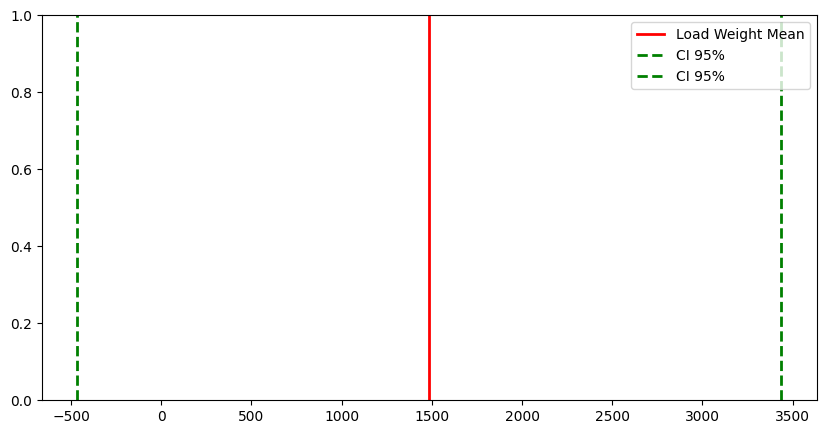

In [33]:
# Visualisasi confidence interval
plt.figure(figsize=(10,5))
plt.axvline(no_outliers['load_weight'].mean(), color='red', linewidth=2, label='Load Weight Mean')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='CI 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='CI 95%')
plt.legend()

Berdasarkan hasil perhitungan diatas, load_weight untuk site baru dapat dinilai lebih besar yaitu sebesar 2745.52107029. Hal ini dikarenakan perhitungannya didasarkan pada rata-rata load weight di tempat pembuanagn sampah. Jadi, pemerintah seharusnya mempertimbangkan nilai kapasitas baru yang berada dalam kisaran berat rata-rata agar tidak terjadinya kelebihan muatan.

## Analisa Uji Hipotesis

8. Analisa uji hipotesis menggunakan H0 dan H1 serta melakukan perhitungan menggunakan t-test.

In [34]:
# Menghitung ttest 1 sample 2 tailed
t_stat,p_val = stats.ttest_1samp(no_outliers['load_weight'], 1360)

print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.10905634470977697
t-statistics: 1.6112665067222631


Dari perhitungan tersebut dapat menemukan jawabannya dengan menggunakan pengujian hipotesis.

Dalam kasus ini :

H0 df = 1120

H1 df != 1120

1120 adalah median load_weight dari df.

Berdasarkan hasil perhitungan di atas dapat diketahui bahwa H0 ditolak atau reject sehingga dapat di simpulkan bahwa rata-rata load_weight berbeda nyata dengan 1120 (median load_weight).

## Jawaban untuk mengasah pemahaman

1.   Teknik handling outliers yang digunakan adalah trimming outliers atau remove outliers dari dataset. Hal ini dibuktikan dengan jumlah data semula adalah 168, jumlah outlier adalah 4, dan jumlah data setelah outlier di handle adalah 164. Hal ini dibuktikan pada soal nomor 5.


2.   Confidence Interval adalah rentang nilai yang menggambarkan ketidapastian seputar estimasi. Dalam confidence interval, nilai yang digunakan adalah 95%. Confidence interval ini salah satu cara terbaik untuk menunjukkan seberapa baiknya suatu estimasi. Jika memang menolak H0, ada 5% kemungkinan hipotesis alternatif gagal, sedangkan 95% dari alternatif hipotesis adalah benar.


3.   Saya menggunakan metode T-test One Sample dikarenakan untuk menentukan apakah rata-rata yang dihitung dari data yang dikumpulkan dari satu kelompok berbeda dari nilai yang ditentukan.



# Problem 2 (Math/Calculus)

In [35]:
# Group by berdasarkan report date dan load weight
Forecasting = df.groupby('report_date')['load_weight'].sum().to_frame()
Forecasting

,load_weight
report_date,
2021-01-01,45200.0
2021-01-02,2204030.0
2021-01-04,2920260.0
2021-01-05,2399840.0
2021-01-06,2453050.0
...,...
2021-07-05,1897290.0
2021-07-06,1989440.0
2021-07-07,1654780.0


In [36]:
Forecasting.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 166 entries, 2021-01-01 to 2021-07-09
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   load_weight  166 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


In [37]:
# mengatur ulang indeks kembali ke indeks default 0, 1, 2 dll.
Forecasting_new = Forecasting.reset_index().index

In [38]:
# Menghitung turunan pertama
v = np.diff(Forecasting['load_weight'])/np.diff(Forecasting_new)
v

array([ 2.15883000e+06,  7.16230000e+05, -5.20420000e+05,  5.32100000e+04,
        6.43800000e+04, -6.04680000e+05, -1.85071000e+06,  2.44587000e+06,
       -4.22690000e+05,  6.24600000e+04,  5.46700000e+04, -3.83660000e+05,
       -1.72733000e+06,  2.39549000e+06, -1.88290000e+05, -2.26300000e+04,
       -8.62600000e+04, -3.20670000e+05, -1.64092000e+06,  2.33737000e+06,
       -4.62800000e+05,  9.81900000e+04,  2.32000000e+03, -4.11490000e+05,
       -1.74633000e+06,  2.40544000e+06, -3.60620000e+05, -5.30800000e+04,
        1.16700000e+05, -3.38770000e+05, -1.75605000e+06, -4.47800000e+04,
        2.65335000e+06, -3.93250000e+05,  9.04200000e+04, -1.49238000e+06,
        1.03346000e+06, -1.87290000e+06,  1.05132000e+06,  2.66098000e+06,
       -5.04400000e+05,  1.42590000e+05,  5.24300000e+04, -9.28000000e+05,
       -2.21332000e+06, -4.05800000e+04,  2.95084000e+06, -2.95220000e+05,
       -1.60400000e+04,  6.48000000e+03, -3.54825000e+05, -2.24201500e+06,
       -1.18620000e+05,  

In [39]:
# Forecasting load sampah di kota Austin pada tanggal 10 Juli 2021
tomorrow = Forecasting['load_weight'][-1] + v[-1] * 1
abs(tomorrow)

1188270.0

## Jawaban untuk mengasah pemahaman

1. Teknik yang digunakan dalam kasus ini menggunakan metode numeric. Hal ini dikarenakan dapat menurunkan load_weight ke load_weight setiap harinya dengan menghitung selisih antara load_weight.


2. Saya membutuhkan fungsi matematis untuk menghitung turunan dengan function np.diff() untuk menghitung perbedaan ke-n di sepanjang axis yang diberikan.


3. Estimasi atau perkiraan load weight pada tanggal 10 Juli 2021 adalah 1188270.0

# Poin Analisis

- Dengan menganalisis dropoff site pada MRF diberitahu bahwa memiliki right skewed distribution yang artinya rata-rata sering kali lebih besar daripada median. 


- Jika pemerintah ingin menambah dropoff site baru, sangat disarankan untuk memiliki kapasitas lebih besar yaitu sebsar 2745.5210702 sesuai perhitungan confidence interval.


- Estimasi total load weight pada 10 Juli 2021 adalah sebesar 1188270.0

